# Dataset analysis
**Copyright 2023 (c) Naomi Chaix-Echel & Nicolas P Rougier**  
Released under a BSD 2-clauses license

## Common packages / functions

In [1]:
%run "00-common.ipynb"

## Load data

In [2]:
data = pd.read_csv("./data/data-processed.csv", parse_dates=["date"])
subject_ids = data['subject_id'].unique()
valid_ids, reject_ids = filter_subjects(data)
task_ids = list(range(1,8))

## Dataset statistics

In [3]:
def bold(s):
    """ Return s as a bold string using ANSI codes """
    return "\033[1m" + s + "\033[0m"

n_trials = len(data)
n_subjects = len(data["subject_id"].unique())
date_start, date_end = data["date"].min(), data["date"].max()
n_days = (date_end - date_start).days
trials_per_day = int(n_trials/n_days)

print()
print(bold("Start date:        "), date_start.strftime("%d %B %Y"))
print(bold("End date:          "), date_end.strftime("%d %B %Y"))
print(bold(f"Duration:          "), f"{n_days:,} days")
      
print(bold("Number of subjects:"), n_subjects)
print(bold("Number of trials:  "), f"{n_trials:,}")
print(bold("Means trials/day:  "), f"{trials_per_day:,}")
print()
for i in range(8):
    count = (data["task_id"] == i).sum()
    print(bold(f"Number of trials for task {i}: "), f"{count:,}")
    
print()
print(bold("Valid IDs (n=%d):" % len(valid_ids)),  ", ".join(valid_ids))
print(bold("Reject IDs (n=%d):" % len(reject_ids)), ", ".join(reject_ids))


Start date:         22 February 2020
End date:           05 December 2022
Duration:           1,017 days
Number of subjects: 22
Number of trials:   1,607,436
Means trials/day:   1,580

Number of trials for task 0:  159,756
Number of trials for task 1:  236,809
Number of trials for task 2:  201,615
Number of trials for task 3:  201,102
Number of trials for task 4:  201,282
Number of trials for task 5:  204,621
Number of trials for task 6:  201,298
Number of trials for task 7:  200,953

Valid IDs (n=14): abr, nem, alv, ala, bar, ces, oli, pac, dor, yoh, las, eri, fic, ber
Reject IDs (n=8): anu, jea, ner, olg, yin, pat, her, hor


## Mean number of trials per month


Number of trials per month


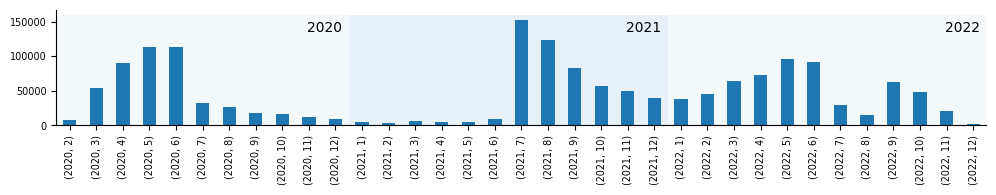

In [4]:
print()
print(bold("Number of trials per month"))
dates = data["date"]
hist = data["date"].groupby([dates.dt.year, dates.dt.month]).count()
ax = hist.plot(kind="bar", figsize=(12, 1.5), xlabel="");
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize="x-small")

x0 = -0.5
x1 = 12 - date_start.month + 0.5
year = date_start.year
ymin, ymax = ax.get_ylim()
for i in range(date_end.year - date_start.year+1):
    plt.fill_betweenx([0, ymax], x0, x1,
                      facecolor="C0", alpha=0.05*(1+(i%2)))
    plt.text(x1-0.25, 0.95*ymax, "%d" % (year+i), va="top", ha="right", color="black")
    x0, x1 = x1, x1+12

## Evolution of mean response time over months


Mean response time (ms) over months


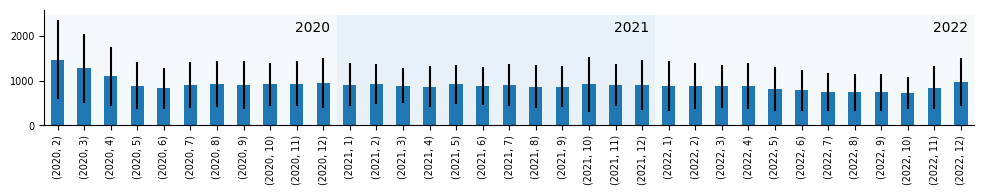

In [5]:
print()
print(bold("Mean response time (ms) over months"))
RT_mean = data["RT"].groupby([data["date"].dt.year, data["date"].dt.month]).mean()
RT_std = data["RT"].groupby([data["date"].dt.year, data["date"].dt.month]).std()

ax = RT_mean.plot(kind="bar", figsize=(12, 1.5), xlabel="", yerr=RT_std)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize="x-small")

x0 = -0.5
x1 = 12 - date_start.month + 0.5
year = date_start.year
ymin, ymax = ax.get_ylim()
for i in range(date_end.year - date_start.year+1):
    plt.fill_betweenx([0, ymax], x0, x1,
                      facecolor="C0", alpha=0.05*(1+(i%2)))
    plt.text(x1-0.25, 0.95*ymax, "%d" % (year+i), va="top", ha="right", color="black")
    x0, x1 = x1, x1+12